### Distribution Families for GLM

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

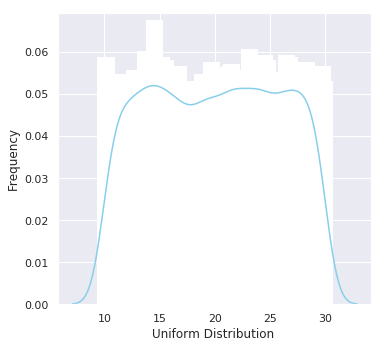

In [8]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# import uniform distribution
from scipy.stats import uniform
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

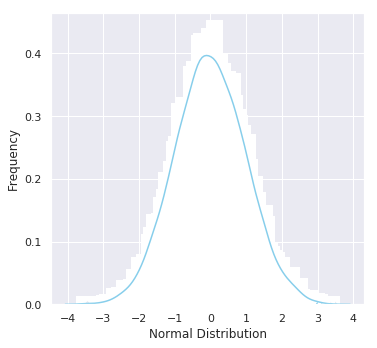

In [9]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

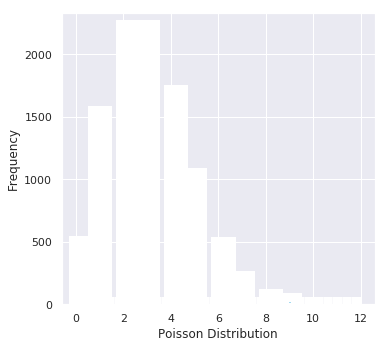

In [10]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

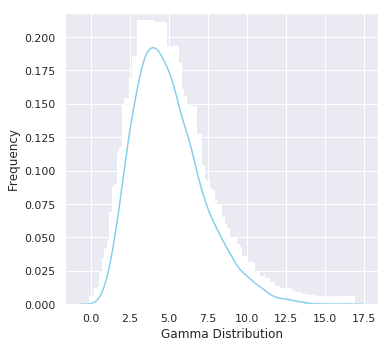

In [11]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

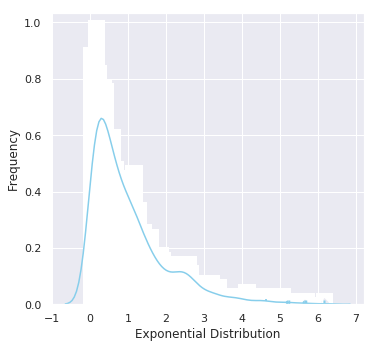

In [12]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

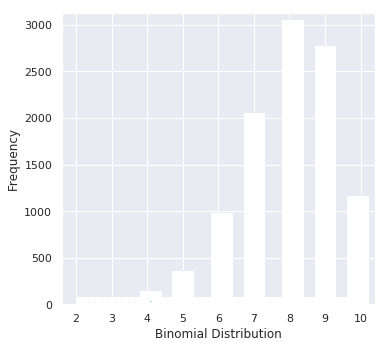

In [13]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

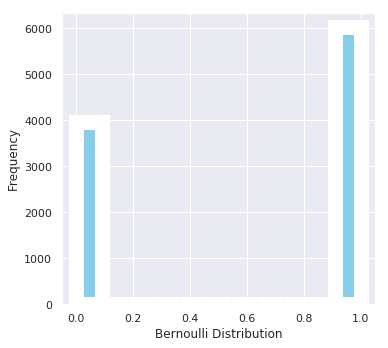

In [14]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

### Generalized Linear Model (GLM) for Regression

In [2]:
import statsmodels.api as sm

data = sm.datasets.scotland.load()

data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/datasets/utils.py:100: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exog = np.column_stack(data[field] for field in exog_name)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Fri, 24 Jan 2020   Deviance:                     0.087389
Time:                        16:26:44   Pearson chi2:                   0.0860
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122      -0.040       0.005
x1          4.962e-05   1.62e-05      3.060      0.0

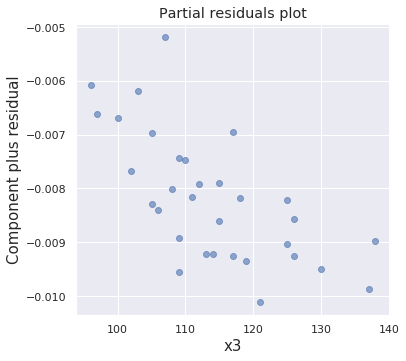

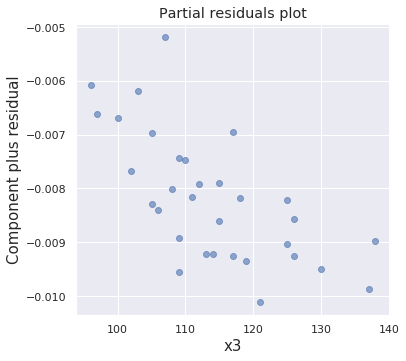

In [22]:
gamma_results.plot_partial_residuals('x3')

### Ordinary Least Squares (OLS) for Regression

In [8]:
import pandas as pd
from sklearn.datasets import load_boston

# load data
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.drop('CHAS', axis=1, inplace=True)
y = pd.Series(boston.target, name='MEDV')

# inspect data
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [17]:
X.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

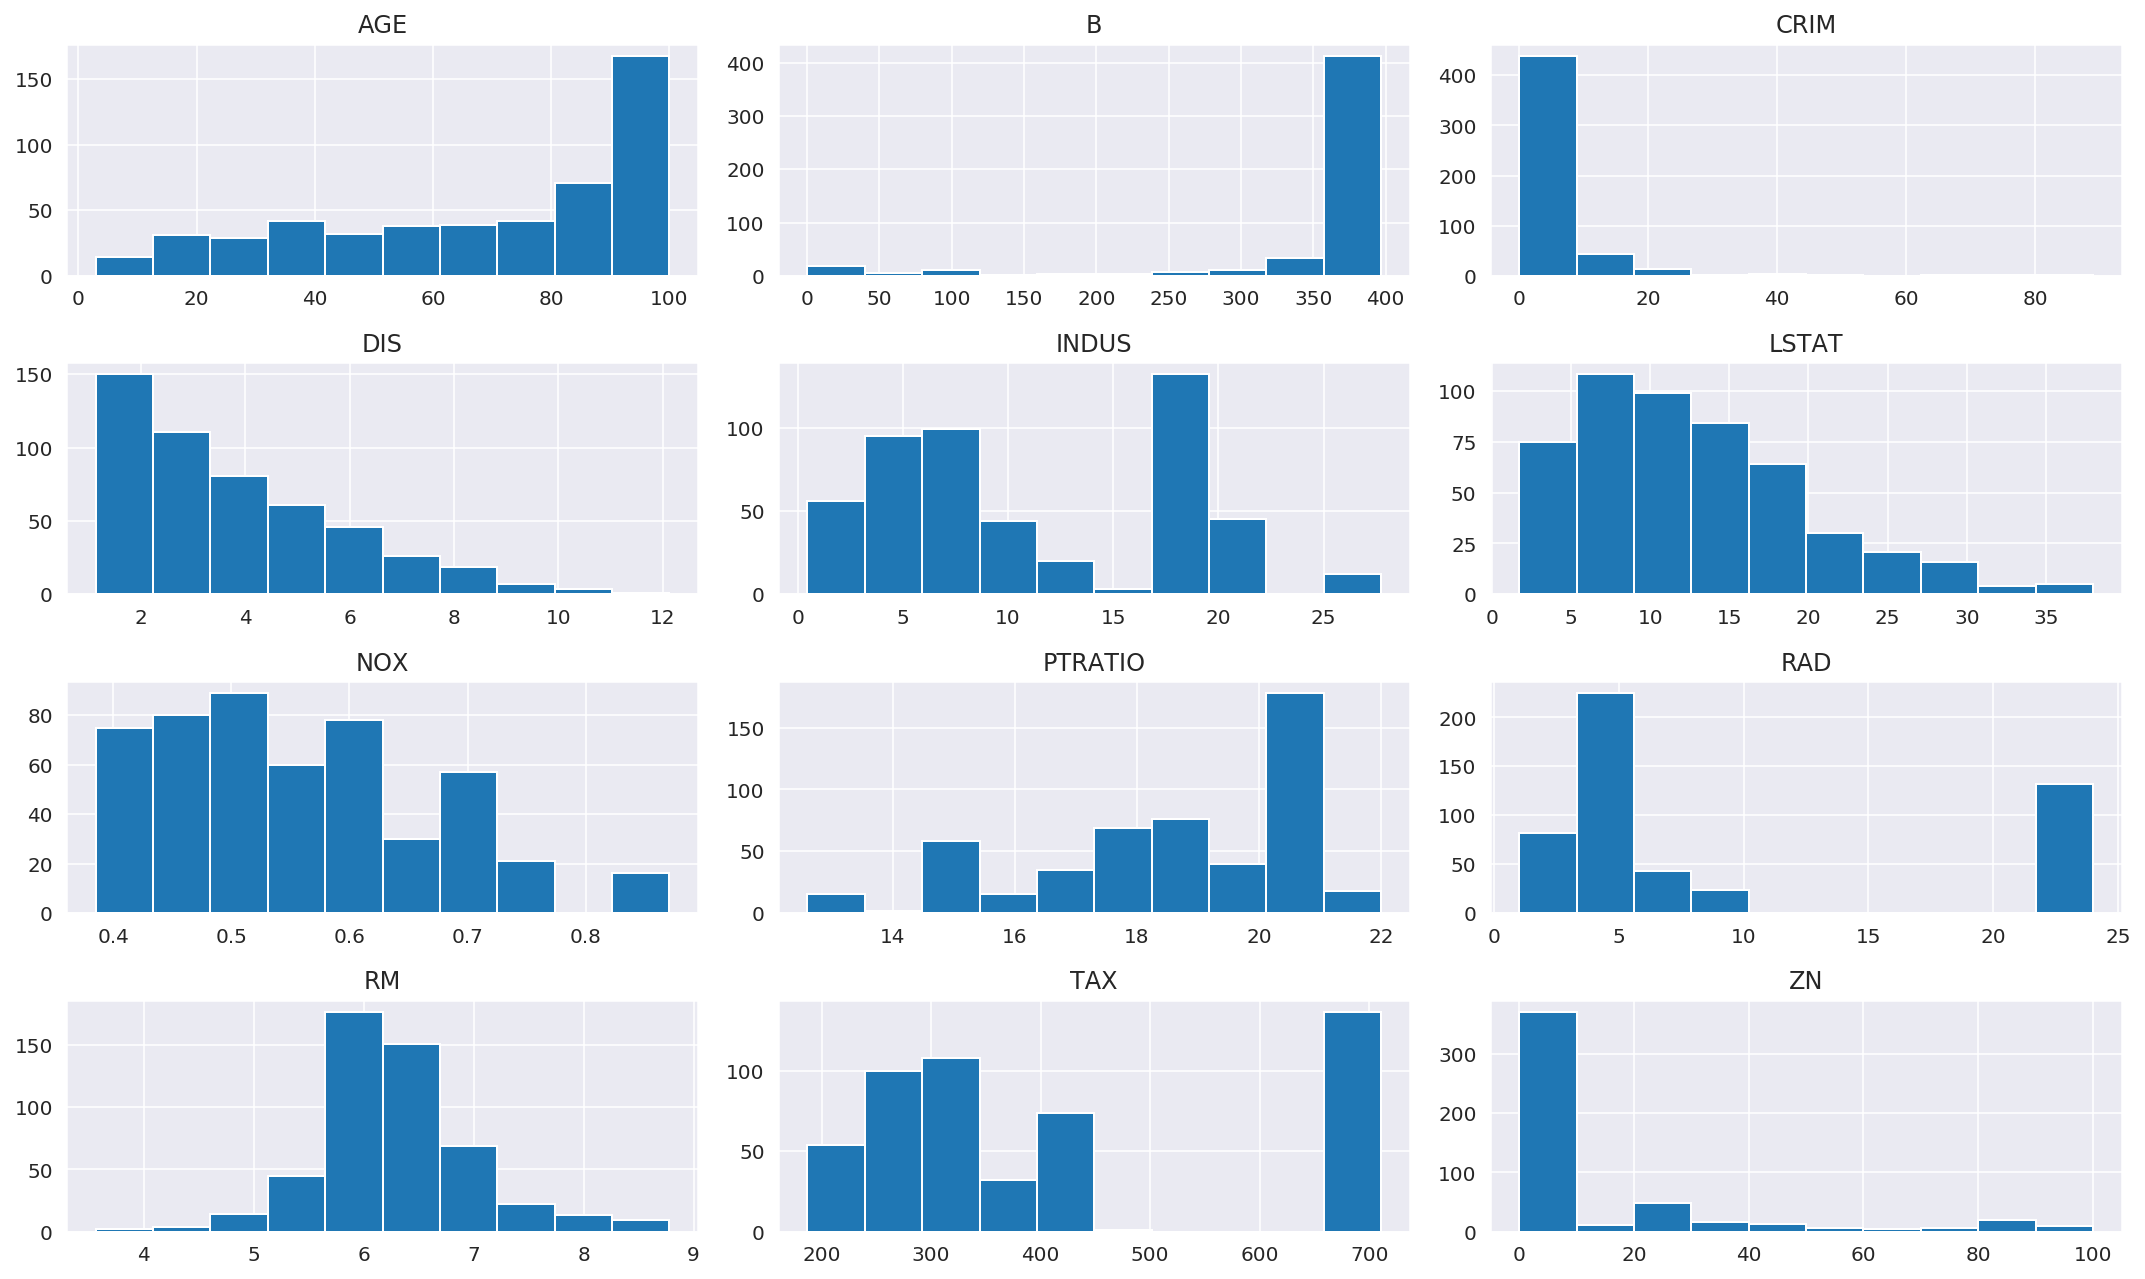

In [18]:
import pylab as pyl #for generating plots: show()
import matplotlib.pyplot as plt #for tight_layout()

X.hist()


plt.tight_layout() #tight_layout(): adjust spacing between subplots to minimize the overlaps.
pyl.show()         #show the histograms

### Regresssion Deep Dive

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-1.13139078e-01  4.70524578e-02  4.03114536e-02 -1.73669994e+01
  3.85049169e+00  2.78375651e-03 -1.48537390e+00  3.28311011e-01
 -1.37558288e-02 -9.90958031e-01  9.74145094e-03 -5.34157620e-01]
Intercept: 36.89195979693238
R^2 score: 0.7355165089722999


In [12]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          7.30e-134
Time:                        20:00:28   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
lin_reg.resid.mean()

-1.0012544153465325e-13

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
vif,1.787705,2.298257,3.949246,4.388775,1.931865,3.092832,3.954961,7.397844,8.876233,1.783302,1.344971,2.931101



 Residuals plots ----


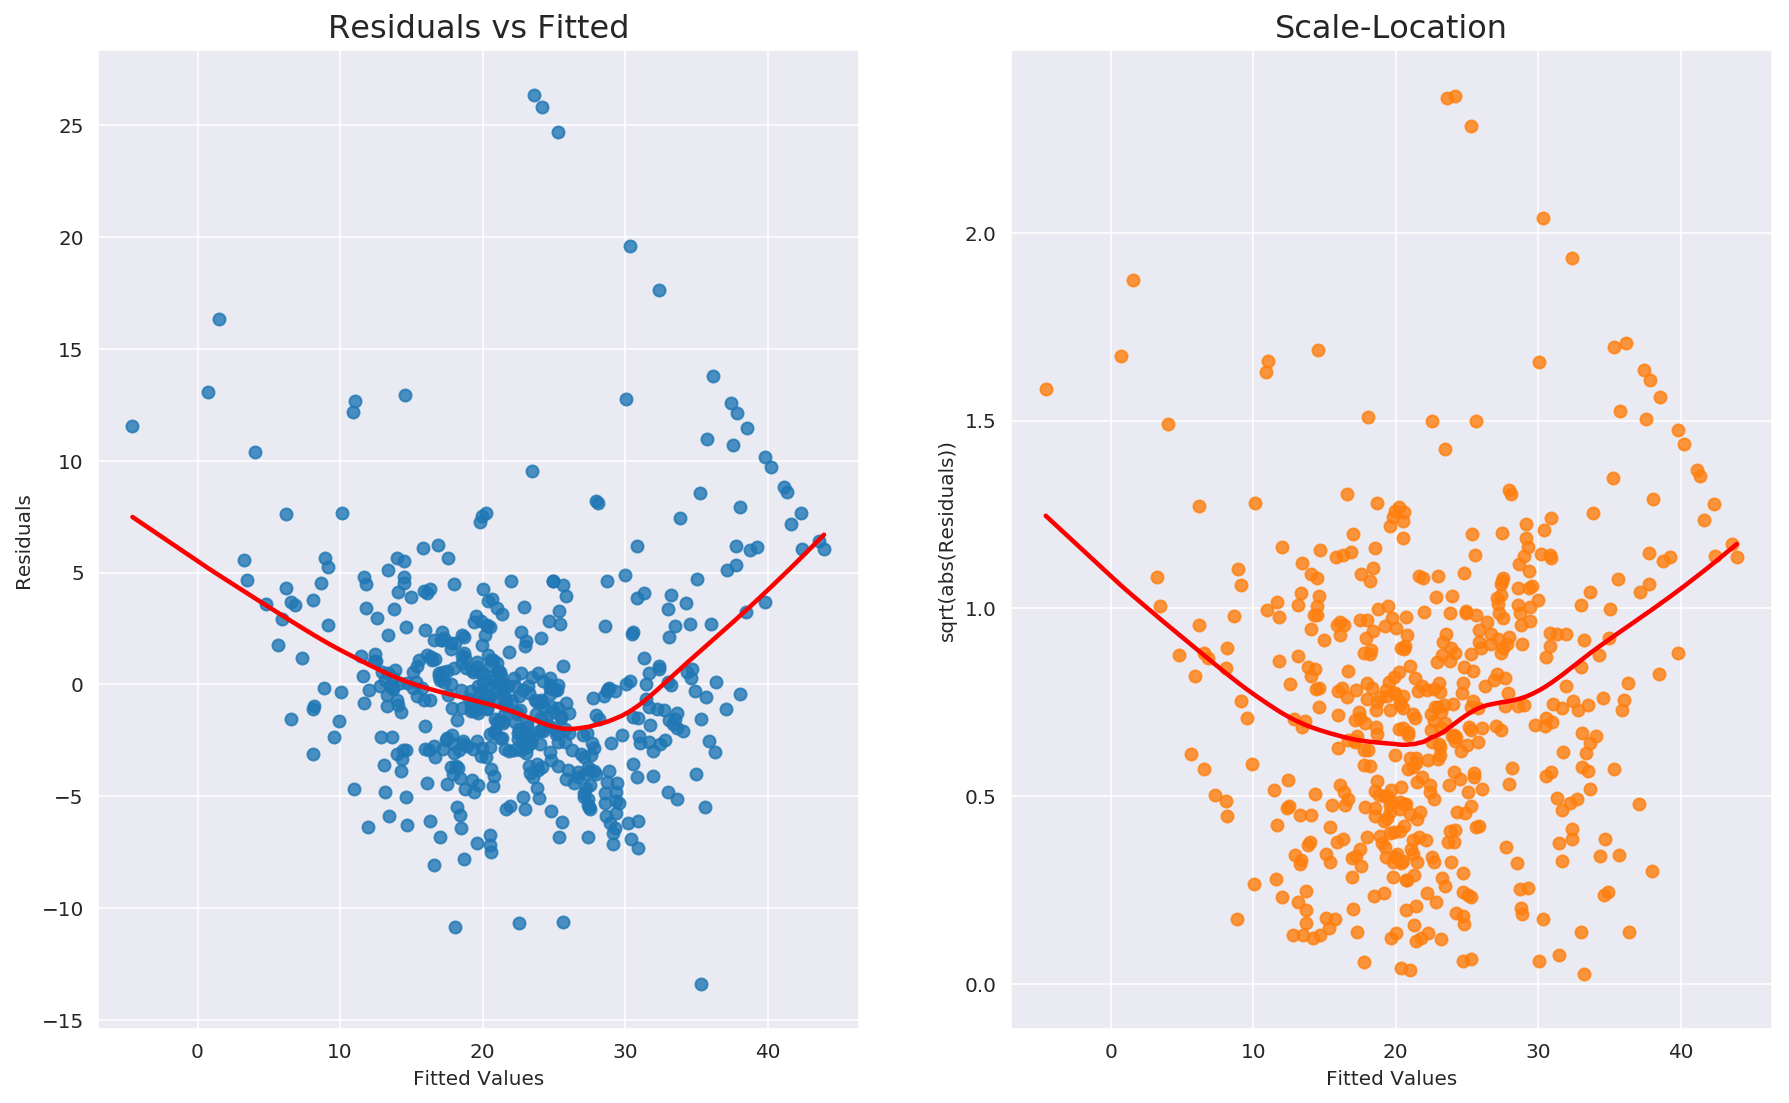

In [10]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

homoscedasticity_test(lin_reg)

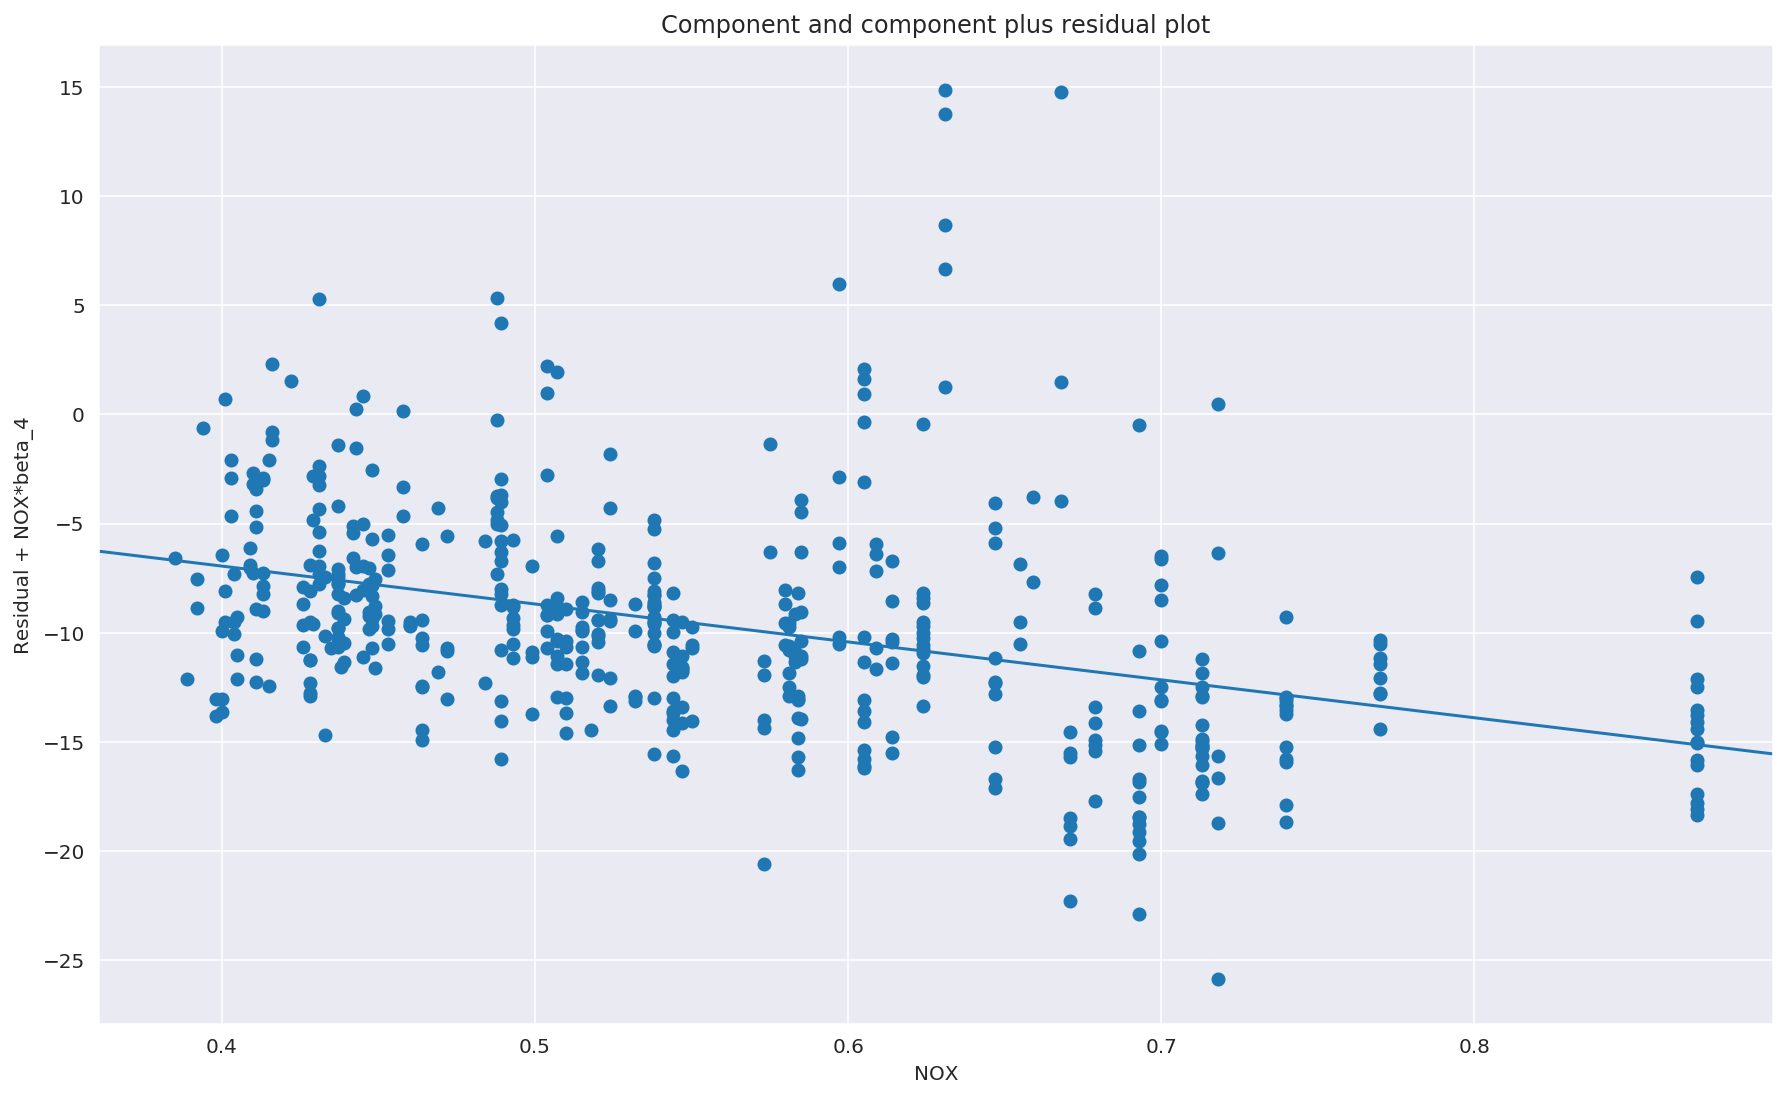

In [14]:
sm.graphics.plot_ccpr(lin_reg, 'NOX')
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


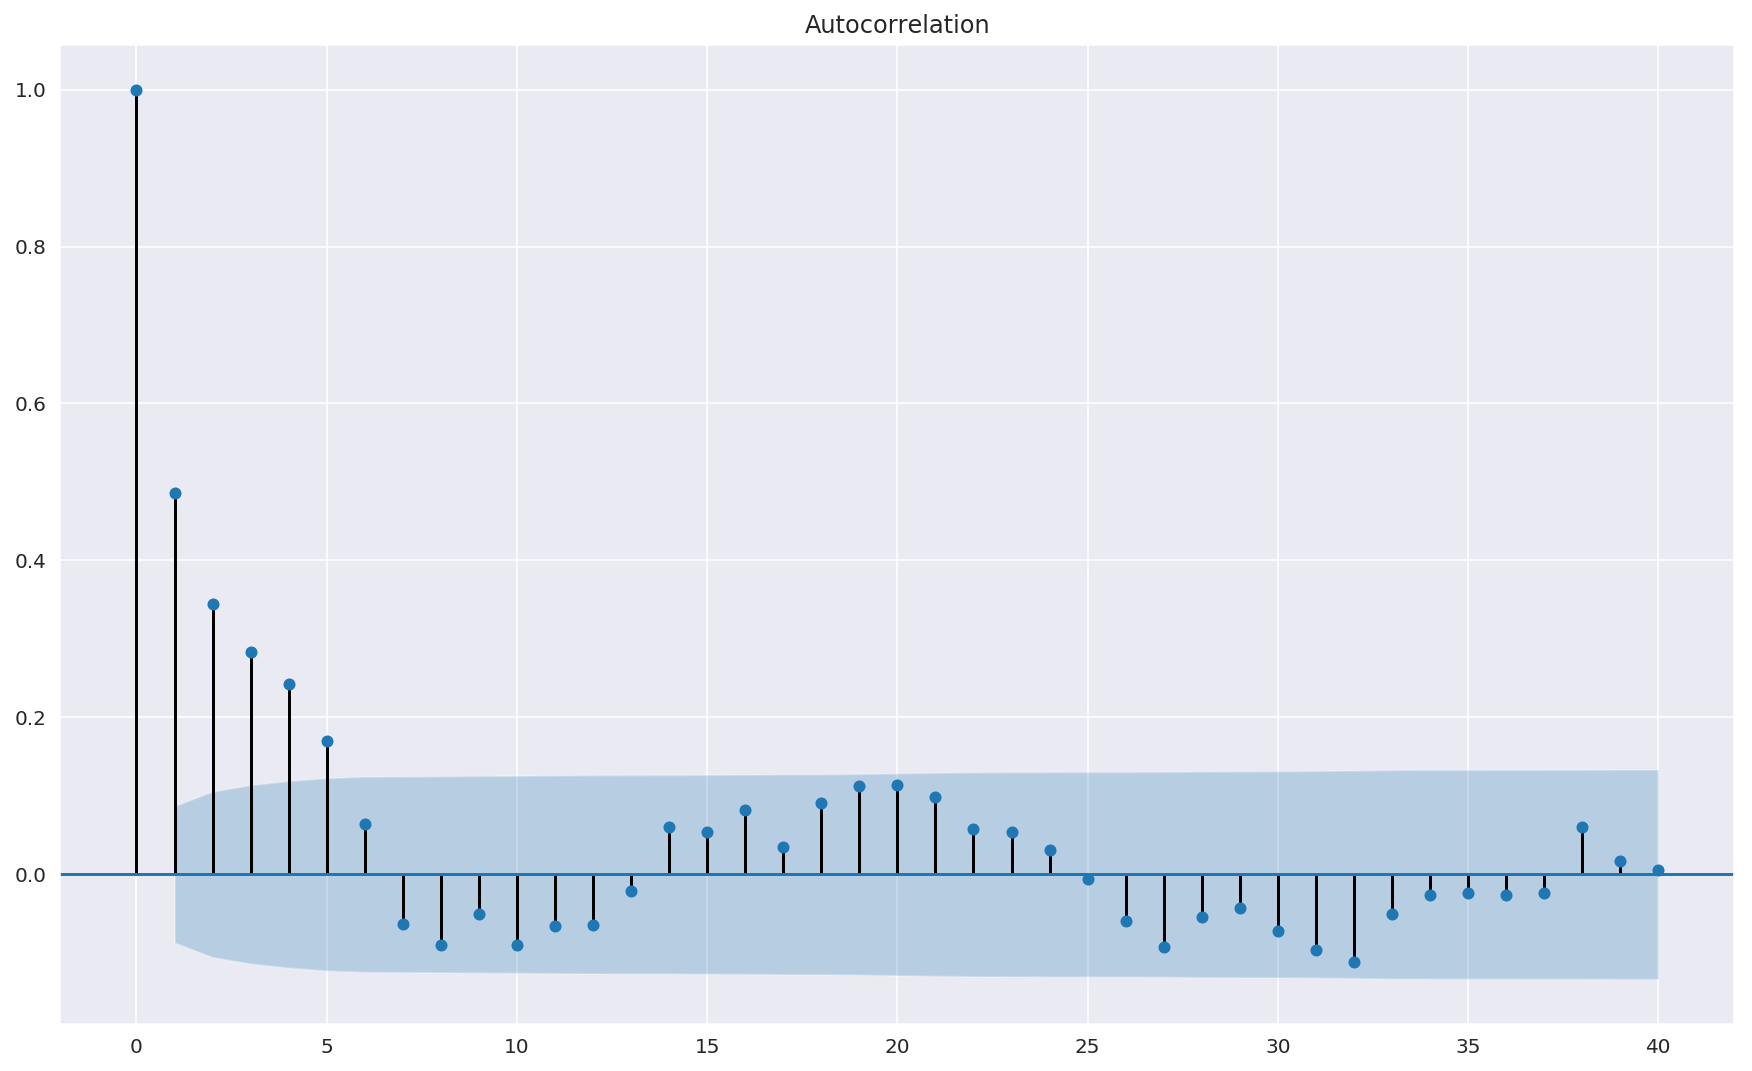

In [12]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

In [15]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')


Variable: CRIM --- correlation: 0.0000, p-value: 1.0000
Variable: ZN --- correlation: -0.0000, p-value: 1.0000
Variable: INDUS --- correlation: 0.0000, p-value: 1.0000
Variable: NOX --- correlation: 0.0000, p-value: 1.0000
Variable: RM --- correlation: -0.0000, p-value: 1.0000
Variable: AGE --- correlation: 0.0000, p-value: 1.0000
Variable: DIS --- correlation: -0.0000, p-value: 1.0000
Variable: RAD --- correlation: 0.0000, p-value: 1.0000
Variable: TAX --- correlation: 0.0000, p-value: 1.0000
Variable: PTRATIO --- correlation: 0.0000, p-value: 1.0000
Variable: B --- correlation: -0.0000, p-value: 1.0000
Variable: LSTAT --- correlation: 0.0000, p-value: 1.0000


In [21]:
X.apply(np.var, axis=0)

CRIM          73.840360
ZN           542.861840
INDUS         46.971430
NOX            0.013401
RM             0.492695
AGE          790.792473
DIS            4.425252
RAD           75.666531
TAX        28348.623600
PTRATIO        4.677726
B           8318.280421
LSTAT         50.893979
dtype: float64

Jarque-Bera test ---- statistic: 898.3521, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8953, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3283, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.9109, 5% critical value: 0.7810
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


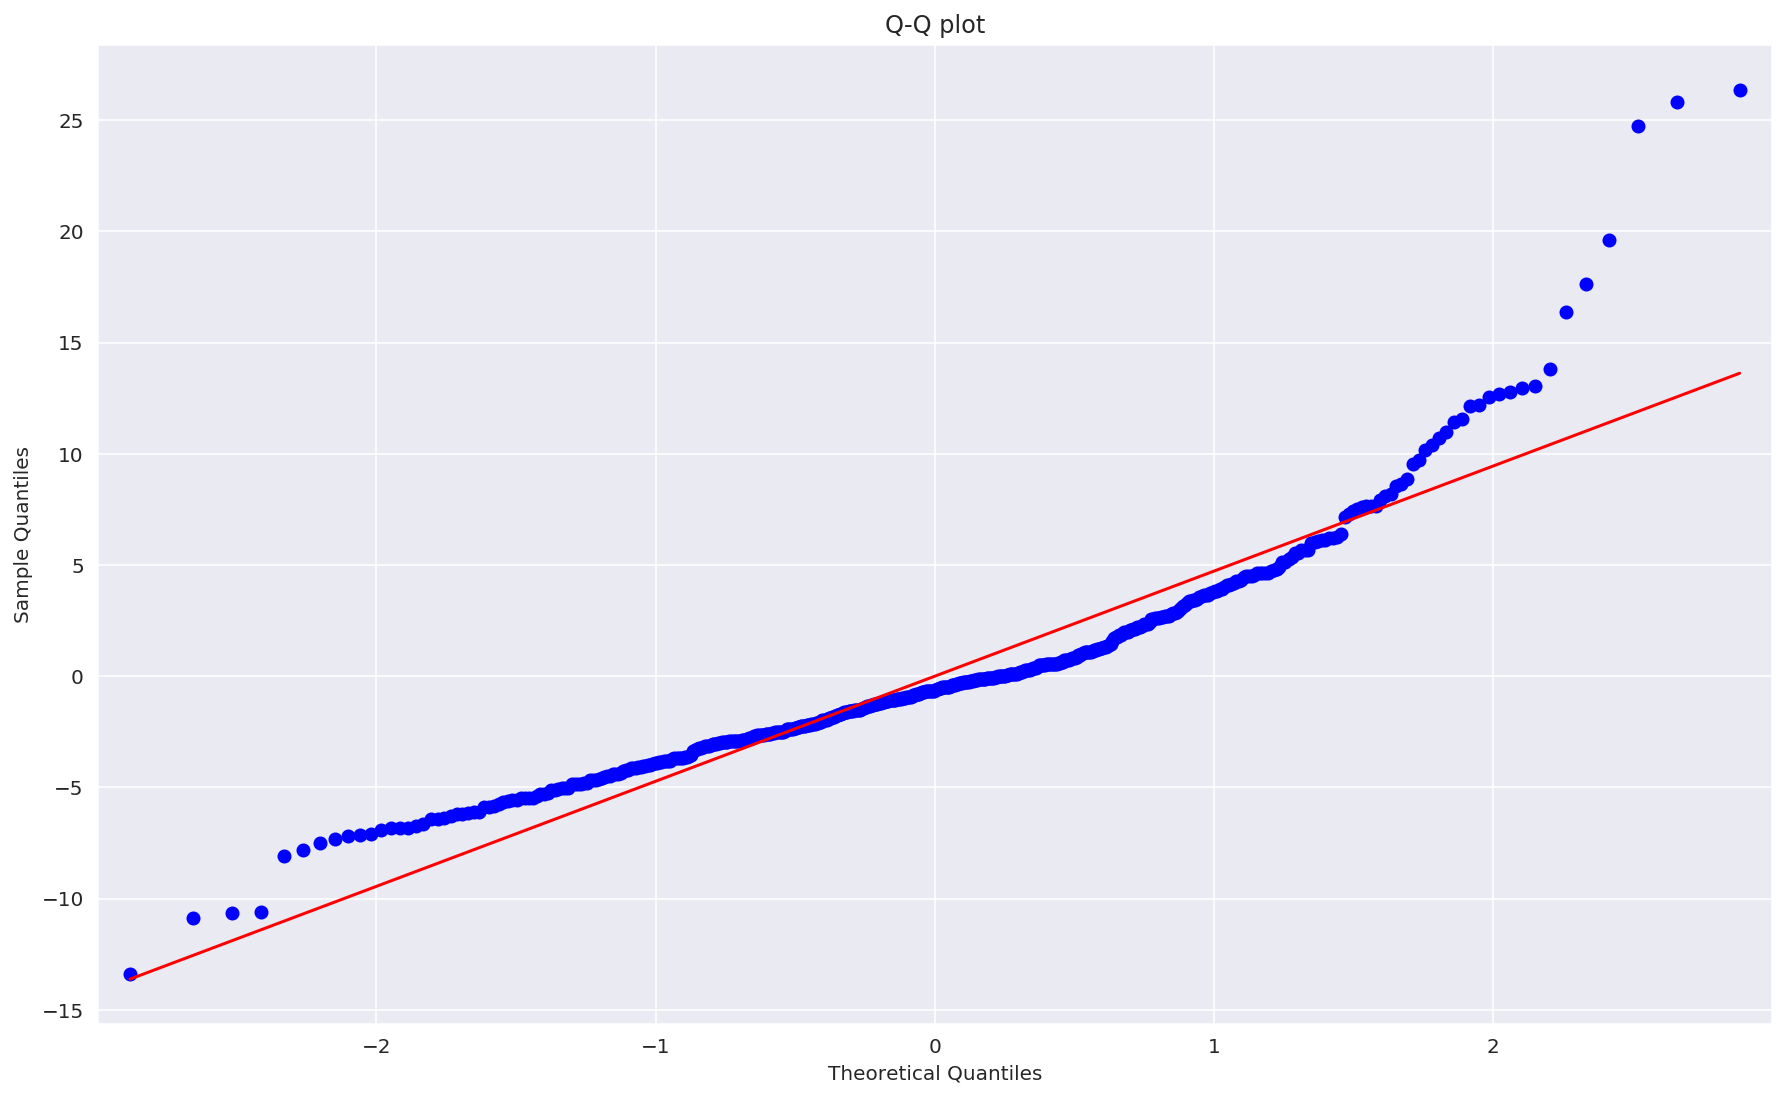

In [22]:

from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Concrete_Data.csv")
x = data.iloc[:,0:8]
y = data.iloc[:,8:]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100) 


In [24]:
data.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Ordinary Least Squares and VIF

In [27]:
import statsmodels.api as sma
import statsmodels.formula.api as sm
import numpy as np
X_train = sma.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(x_test) 
lm2 = sm.OLS(y_train,X_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     161.0
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          4.37e-162
Time:                        20:19:00   Log-Likelihood:                -3090.4
No. Observations:                 824   AIC:                             6199.
Df Residuals:                     815   BIC:                             6241.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.2735     29.931     -1.145      0.253     -93.025      24.478
Cement               0.1242      0.010     13.054      0.000       0.105       0.143
Blast                0.1037      0.011      9.229      0.000       0.082       0.126
Fly Ash              0.0934      0.014      6.687      0.000       0.066       0.121
Water               -0.1343      0.046     -2.947      0.003      -0.224      -0.045
Superplasticizer     0.2880      0.102      2.810      0.005       0.087       0.489
CA                   0.0207      0.011      1.966      0.050    2.79e-05       0.041
FA                   0.0256      0.012      2.131      0.033       0.002       0.049
Age                  0.1146      0.006     19.064      0.000       0.103       0.126
==============================================================================
Omnibus:                        3.757   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.762
Skew:                          -0.165   Prob(JB):                        0.152
Kurtosis:                       2.974   Cond. No.                     1.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
influence = lm2.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([x_train,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,Studentized Residuals
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,1.559672
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,-0.917354
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,1.057443
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,0.637504
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,-1.170290


In [32]:
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,Studentized Residuals
649,166.8,250.2,0.0,203.5,0.0,975.6,692.6,3.0,3.161183


In [33]:
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index
ind

Int64Index([649], dtype='int64')

In [34]:
y_train.drop(ind,axis = 0,inplace = True)
x_train.drop(ind,axis = 0,inplace = True)  #Interept column is not there
X_train.drop(ind,axis = 0,inplace = True)  #Intercept column is there

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
train_out = calculate_vif(x_train) 
train_out.head()

Iteration no.
1
[15.47758260195686, 3.2696650121931814, 4.129325501299342, 82.21008475163109, 5.21853674386234, 85.86694548901554, 71.81633694293068, 1.686160096846766]
Max VIF is for variable no.:
5
Iteration no.
2
[14.517486362670928, 3.2477734890453647, 3.968695653417151, 71.53530428408644, 5.1775267752249094, 48.27016091702854, 1.6861256310510393]
Max VIF is for variable no.:
3
Iteration no.
3
[9.385732352700492, 2.082876994657241, 3.009516852485082, 2.910827525646028, 14.418586504418238, 1.572151969798833]
Max VIF is for variable no.:
4
Iteration no.
4
[2.6936535297265767, 1.528289203660763, 1.9044394378899658, 2.8907052492126315, 1.5380724272424997]
Max VIF is for variable no.:
3


,Cement,Blast,Fly Ash,Superplasticizer,Age
337,275.1,0.0,121.4,9.9,56
384,516.0,0.0,0.0,8.2,28
805,393.0,0.0,0.0,0.0,90
682,183.9,122.6,0.0,0.0,28
329,246.8,0.0,125.1,12.0,3


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])]

[15.47758260195686,
 3.2696650121931814,
 4.129325501299342,
 82.21008475163109,
 5.21853674386234,
 85.86694548901554,
 71.81633694293068,
 1.686160096846766]

In [38]:
import statsmodels.api as sma
import statsmodels.formula.api as sm
train_out = sma.add_constant(train_out) ## let's add an intercept (beta_0) to our model
x_test.drop(["Water","CA","FA"],axis = 1,inplace = True)
X_test = sma.add_constant(x_test)
lm2 = sm.OLS(y_train,train_out).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     216.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):          6.88e-147
Time:                        20:23:17   Log-Likelihood:                -3128.8
No. Observations:                 823   AIC:                             6270.
Df Residuals:                     817   BIC:                             6298.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -11.1119      1.915     -5.803      0.000     -14.871      -7.353
Cement               0.1031      0.005     20.941      0.000       0.093       0.113
Blast                0.0721      0.006     12.622      0.000       0.061       0.083
Fly Ash              0.0614      0.009      6.749      0.000       0.044       0.079
Superplasticizer     0.7519      0.077      9.739      0.000       0.600       0.903
Age                  0.1021      0.006     16.582      0.000       0.090       0.114
==============================================================================
Omnibus:                        0.870   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.945
Skew:                           0.039   Prob(JB):                        0.623
Kurtosis:                       2.853   Cond. No.                     1.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[code by Eryk Lewinson](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)